In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib
from scipy.stats import kstest

In [13]:
data = pd.read_csv('simulated_data_ks_test_2.csv')
data

,iteration,j_delta_1,j_delta_2,j_delta_3,j_delta_4,j_delta_5,j_delta_6,j_delta_7,j_delta_8,j_delta_9,...,f_delta_90,f_delta_91,f_delta_92,f_delta_93,f_delta_94,f_delta_95,f_delta_96,f_delta_97,f_delta_98,f_delta_99
0,0,1.052137,1.082291,1.114358,1.150674,1.184368,1.220606,1.253192,1.287864,1.327008,...,1.852325,1.860397,1.867924,1.876049,1.883674,1.895363,1.905175,1.913965,1.922764,1.928999
1,1,1.048514,1.078940,1.109797,1.143944,1.176746,1.210577,1.244316,1.276695,1.310571,...,2.981248,3.015728,3.042686,3.071473,3.098792,3.124279,3.144729,3.166886,3.202732,3.239016
2,2,1.047446,1.075370,1.106613,1.139704,1.171919,1.205082,1.238198,1.269230,1.302585,...,2.260442,2.287904,2.314613,2.343638,2.376258,2.407789,2.437669,2.468336,2.504362,2.535689
3,3,1.047625,1.075620,1.104754,1.138262,1.170045,1.202693,1.236846,1.268289,1.301980,...,2.003607,2.016194,2.029071,2.041212,2.055124,2.075487,2.091735,2.108139,2.125898,2.138965
4,4,1.051119,1.081655,1.113190,1.147016,1.180358,1.214307,1.246841,1.283288,1.322743,...,1.046299,1.048202,1.049563,1.049958,1.049495,1.050976,1.051813,1.051814,1.051592,1.050334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,1.047475,1.076447,1.107441,1.140444,1.173561,1.208432,1.242693,1.277633,1.315150,...,1.869460,1.879698,1.886966,1.895186,1.898816,1.907268,1.914281,1.920462,1.927161,1.935684
996,996,1.048415,1.078615,1.108537,1.142702,1.175541,1.206211,1.237483,1.272165,1.309654,...,3.640261,3.639576,3.628788,3.623735,3.625125,3.618540,3.617089,3.618997,3.621240,3.622659
997,997,1.046799,1.076515,1.107773,1.142992,1.174847,1.207794,1.241336,1.273710,1.308199,...,2.410338,2.439712,2.467990,2.497298,2.524812,2.554236,2.586356,2.623165,2.654584,2.682198
998,998,1.047849,1.075524,1.105073,1.137659,1.169162,1.202261,1.235606,1.267590,1.300867,...,2.078214,2.081280,2.084856,2.086877,2.089719,2.102257,2.109771,2.124864,2.136316,2.147405


In [3]:
j_data = data[['j_delta_' + str(i) for i in range(10, 100, 10)]].copy()
j_data.columns = [str(i) for i in range(10, 100,10)]
j_data = j_data.melt(value_vars = [str(i) for i in range(10, 100, 10)])
j_data.columns = ['n', 'value']
j_data["type"] = ["Isoform Junctions"] * 9000
j_data



,n,value,type
0,10,1.366262,Isoform Junctions
1,10,1.344582,Isoform Junctions
2,10,1.336125,Isoform Junctions
3,10,1.337963,Isoform Junctions
4,10,1.361367,Isoform Junctions
...,...,...,...
8995,90,5.270453,Isoform Junctions
8996,90,5.228481,Isoform Junctions
8997,90,5.311221,Isoform Junctions
8998,90,5.164025,Isoform Junctions


In [4]:
f_data = data[['f_delta_' + str(i) for i in range(10, 100, 10)]].copy()
f_data.columns = [str(i) for i in range(10, 100,10)]

f_data = f_data.melt(value_vars = [str(i) for i in range(10, 100, 10)])
f_data.columns = ['n', 'value']
f_data["type"] = ["Random Positions"] * 9000
f_data

,n,value,type
0,10,1.078472,Random Positions
1,10,1.144490,Random Positions
2,10,1.103193,Random Positions
3,10,1.121286,Random Positions
4,10,1.033534,Random Positions
...,...,...,...
8995,90,1.869460,Random Positions
8996,90,3.640261,Random Positions
8997,90,2.410338,Random Positions
8998,90,2.078214,Random Positions


In [7]:
data = pd.concat([f_data, j_data])
data['value'] = data['value']
data

,n,value,type
0,10,1.078472,Random Positions
1,10,1.144490,Random Positions
2,10,1.103193,Random Positions
3,10,1.121286,Random Positions
4,10,1.033534,Random Positions
...,...,...,...
8995,90,5.270453,Isoform Junctions
8996,90,5.228481,Isoform Junctions
8997,90,5.311221,Isoform Junctions
8998,90,5.164025,Isoform Junctions


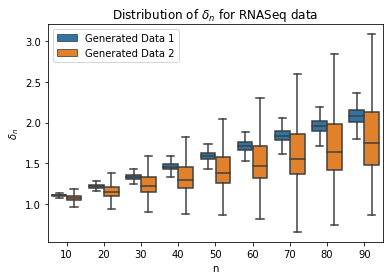

In [37]:
fig, ax = plt.subplots()

g = sns.boxplot(x='n', y='value', hue='type', data=data, showfliers=False)
ax.set_title(r"Distribution of $\delta_n$ for RNASeq data")
ax.set_ylabel(r"$\delta_n$")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, loc='upper left')

plt.show()


In [10]:
save = False
if save:
    matplotlib.use("pgf")
    matplotlib.rcParams.update({
        "pgf.texsystem": "pdflatex",
        'font.family': 'serif',
        'text.usetex': True,
        'pgf.rcfonts': False,
    })
    
    plt.savefig("rna_data_delta_n.pgf")

In [8]:
data = pd.read_csv('bam_file_ks_test.csv')


In [9]:
data['j_delta_1']
data['f_delta_1']


0       1.031817
1       1.481214
2       0.901907
3       0.608886
4       0.930436
         ...    
995     1.018921
996     1.015925
997    59.543990
998     1.058267
999     1.031568
Name: f_delta_1, Length: 1000, dtype: float64

In [14]:
x = data['j_delta_99'].to_numpy()
y = data['f_delta_99'].to_numpy()

kstest(x, y)


KstestResult(statistic=0.994, pvalue=0.0)

In [15]:
test_results = []

for i in [1, 5] + list(range(10, 99, 10)):
    x = data['j_delta_' + str(i)].to_numpy()
    y = data['f_delta_' + str(i)].to_numpy()

    statistic, pvalue = kstest(x, y)
    test_results.append({'n': i, 'statistic': statistic, 'pvalue': pvalue})

test_results = pd.DataFrame(test_results)
test_results

,n,statistic,pvalue
0,1,0.992,0.0
1,5,0.984,0.0
2,10,0.987,0.0
3,20,0.988,0.0
4,30,0.989,0.0
5,40,0.991,0.0
6,50,0.990,0.0
7,60,0.988,0.0
8,70,0.989,0.0
9,80,0.990,0.0


In [28]:
test_results.to_latex('ks_test_bam.tex', index=False)

In [34]:
data = pd.read_csv('simulated_data_ks_test.csv')
j_data = data[['f_delta_' + str(i) for i in range(10, 100, 10)]].copy()
j_data.columns = [str(i) for i in range(10, 100,10)]
j_data = j_data.melt(value_vars = [str(i) for i in range(10, 100, 10)])
j_data.columns = ['n', 'value']
j_data["type"] = ["Generated Data 1"] * 9000
j_data1 = j_data
data1 = data

In [35]:
data = pd.read_csv('simulated_data_ks_test_2.csv')
j_data = data[['f_delta_' + str(i) for i in range(10, 100, 10)]].copy()
j_data.columns = [str(i) for i in range(10, 100,10)]
j_data = j_data.melt(value_vars = [str(i) for i in range(10, 100, 10)])
j_data.columns = ['n', 'value']
j_data["type"] = ["Generated Data 2"] * 9000
j_data2 = j_data
data2 = data

In [36]:
data = pd.concat([j_data1, j_data2])
data['value'] = data['value']
data

,n,value,type
0,10,1.093158,Generated Data 1
1,10,1.111936,Generated Data 1
2,10,1.119667,Generated Data 1
3,10,1.095537,Generated Data 1
4,10,1.112862,Generated Data 1
...,...,...,...
8995,90,1.869460,Generated Data 2
8996,90,3.640261,Generated Data 2
8997,90,2.410338,Generated Data 2
8998,90,2.078214,Generated Data 2


In [32]:
test_results = []

for i in [1, 5] + list(range(10, 99, 10)):
    x = data1['j_delta_' + str(i)].to_numpy()
    y = data2['j_delta_' + str(i)].to_numpy()

    statistic, pvalue = kstest(x, y)
    test_results.append({'n': i, 'statistic': statistic, 'pvalue': pvalue})

test_results = pd.DataFrame(test_results)
test_results

,n,statistic,pvalue
0,1,0.886,0.000000e+00
1,5,0.968,0.000000e+00
2,10,0.928,0.000000e+00
3,20,0.849,0.000000e+00
4,30,0.787,1.045272e-307
5,40,0.707,1.724145e-240
6,50,0.573,5.500890e-152
7,60,0.442,3.150824e-88
8,70,0.351,4.649273e-55
9,80,0.409,3.288333e-75
